## Importaciones

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from src.exploring_functions import *

In [3]:
medidas1 = pd.read_csv('measurements.csv')
medidas2 = pd.read_excel('measurements2.xlsx')

## Limpieza de los datos

In [4]:
medidas1.shape, medidas2.shape 

((388, 12), (388, 12))

In [5]:
medidas1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [6]:
medidas2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


Los dos dataframes son iguales, por lo que se van a llamar los dos medidas

In [7]:
medidas = medidas1.copy()

In [8]:
medidas[medidas.duplicated()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas


In [9]:
medidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


Como se puede observar, las columnas 'distance', 'consume', 'temp_inside' deberían ser tipo float y están como tipo object. Esto hay que arreglarlo

In [10]:
medidas.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

Ahora se van a estudiar las columnas de refill, que tienen una gran cantidad de nulos

In [11]:
medidas[medidas['refill gas'].notnull()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
44,"5,4","3,3",32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
82,"10,5","3,6",42,20,10,NaN,SP98,0,0,0,"37,7",SP98
106,"162,7","5,5",75,23,1,NaN,SP98,0,0,0,45,SP98
139,"16,1","5,4",24,"21,5",7,rain,E10,0,1,0,38,E10
171,"44,4","4,8",38,"21,5",8,NaN,E10,0,0,0,"38,3",E10
191,"43,7","4,7",44,22,9,half rain half sun,SP98,0,1,0,10,SP98
192,"12,1","4,2",43,22,4,NaN,SP98,0,0,0,39,SP98
234,19,"4,5",29,"22,5",10,NaN,E10,0,0,0,39,E10
274,"25,7","4,9",50,22,10,rain,SP98,0,1,0,41,SP98


Como se puede comprobar, la columnas refill gas solo tiene 13 valores no nulos y todos ellos son iguales a la columna gas_type por lo que no aporta información y se va a eliminar

In [12]:
medidas[medidas['refill liters'].notnull()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
44,"5,4","3,3",32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
82,"10,5","3,6",42,20,10,NaN,SP98,0,0,0,"37,7",SP98
106,"162,7","5,5",75,23,1,NaN,SP98,0,0,0,45,SP98
139,"16,1","5,4",24,"21,5",7,rain,E10,0,1,0,38,E10
171,"44,4","4,8",38,"21,5",8,NaN,E10,0,0,0,"38,3",E10
191,"43,7","4,7",44,22,9,half rain half sun,SP98,0,1,0,10,SP98
192,"12,1","4,2",43,22,4,NaN,SP98,0,0,0,39,SP98
234,19,"4,5",29,"22,5",10,NaN,E10,0,0,0,39,E10
274,"25,7","4,9",50,22,10,rain,SP98,0,1,0,41,SP98


La columna 'refill liters' no tiene más que 13 valores no nulos, por lo que se va a eliminar también

In [13]:
medidas.drop(columns=['refill gas','refill liters'],inplace=True)

Ahora se va  estudiar la columna specials, que tiene una gran cantidad de nulos

In [14]:
medidas[medidas.specials.notna()]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
40,"12,4",4,55,"21,5",7,AC rain,E10,1,1,0
41,"4,5",5,29,"21,5",7,AC,E10,1,0,0
50,"11,8","5,1",29,"21,5",5,rain,SP98,0,1,0
53,"13,1","6,1",46,"21,5",6,rain,SP98,0,1,0
55,"153,5","4,9",82,"21,5",3,rain,SP98,0,1,0
...,...,...,...,...,...,...,...,...,...,...
381,"5,5","3,7",33,"24,5",28,sun,SP98,0,0,1
382,"13,6","3,7",33,"24,5",28,sun,SP98,0,0,1
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0


In [15]:
medidas.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [16]:
medidas[medidas.specials=='ac rain']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
344,"16,1","5,1",30,25,16,ac rain,E10,1,1,0


In [17]:
# Se va a hacer un get dummies de la columna snow a partir de la columna specials
indice = medidas[medidas.specials.notna() & medidas.specials.str.contains('snow')].index
medidas['snow'] = 0
medidas.snow.iloc[indice] = 1

<ipython-input-17-192bb3b71791>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medidas.snow.iloc[indice] = 1


Se puede comprobar como la columna specials se le ha hecho un get dummies y se han generado las columnas AC rain y sun, por lo que ya no aporta información extra

In [18]:
medidas.drop(columns=['specials'],inplace=True)

Ahora se va a hacer la transformación de las columnas object que deberían ser float

In [19]:
medidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
 9   snow          388 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 30.4+ KB


In [20]:
for e in ['distance', 'consume', 'temp_inside']:
    # Lo primero es cambiar las ',' por '.' para poder hacer la transformación
    medidas[e] = medidas[e].apply(lambda x : str(x).replace(',', '.'))
    # Ahora hay que cambiar el tipo de columa
    medidas[e] = medidas[e].astype(float)

In [21]:
medidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
 9   snow          388 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.4+ KB


Las columnas ya tienen el tipo de dato adecuado, ahora se puede seguir con la limpieza de la columna 'temp_inside' que es la única con nulos, pero como solo hay 12 valores nulos de 388, son una cantidad pequeña y se van a eliminar

In [22]:
medidas.dropna(inplace=True)

Ahora se van a explorar las columnas dummies

In [23]:
print(medidas.AC.value_counts(), '\n\n',medidas.rain.value_counts(), '\n\n',medidas.sun.value_counts())

0    346
1     30
Name: AC, dtype: int64 

 0    329
1     47
Name: rain, dtype: int64 

 0    345
1     31
Name: sun, dtype: int64


In [24]:
medidas.gas_type.value_counts()

SP98    219
E10     157
Name: gas_type, dtype: int64

Se va hacer un get dummies de la columan gas_type 

In [25]:
medidas = pd.get_dummies(medidas, columns=['gas_type'])

In [26]:
medidas.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,snow,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,0,1,0


Por último se van a explorar las columnas de temperatura

In [27]:
print(list(medidas.temp_inside.value_counts()))

[133, 102, 59, 25, 13, 13, 12, 7, 4, 3, 2, 2, 1]


In [28]:
print(list(medidas.temp_outside.value_counts()))

[30, 29, 28, 21, 19, 19, 17, 17, 16, 16, 15, 14, 13, 13, 13, 12, 12, 9, 8, 7, 7, 7, 5, 5, 4, 3, 3, 3, 3, 3, 2, 2, 1]


Ahora solo queda hacer un downcast al datframe para eliminar espacio de memoria innecesario

In [29]:
donwcast_df(medidas, verbose=0)

In [30]:
medidas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       376 non-null    float32
 1   consume        376 non-null    float32
 2   speed          376 non-null    int8   
 3   temp_inside    376 non-null    float32
 4   temp_outside   376 non-null    int8   
 5   AC             376 non-null    int8   
 6   rain           376 non-null    int8   
 7   sun            376 non-null    int8   
 8   snow           376 non-null    int8   
 9   gas_type_E10   376 non-null    int8   
 10  gas_type_SP98  376 non-null    int8   
dtypes: float32(3), int8(8)
memory usage: 10.3 KB


Ahora ya está el dataframe limpio

## Exploración de datos

Primero se va a comprobar si están o no balanceados los datos en función del combustible

El porcentaje de datos con gas_type_E10 es: 0.5824468085106383
El porcentaje de datos con gas_type_SP98 es: 0.4175531914893617


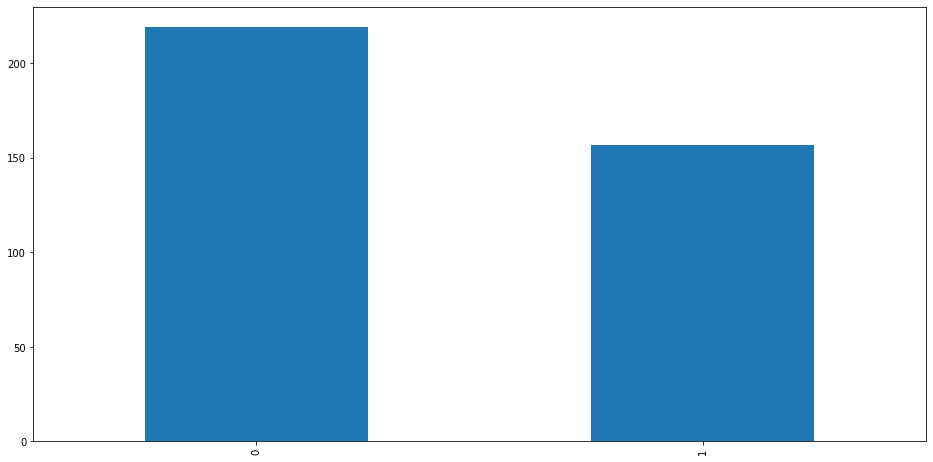

In [31]:
medidas.gas_type_E10.value_counts().plot(kind='bar', figsize=(16,8));
print('El porcentaje de datos con gas_type_E10 es:', list(medidas.gas_type_E10.value_counts())[0]/medidas.shape[0])
print('El porcentaje de datos con gas_type_SP98 es:', list(medidas.gas_type_E10.value_counts())[1]/medidas.shape[0])

In [32]:
medidas.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,376.0,19.797340,22.988878,1.3,11.8,14.6,19.0,216.100006
consume,376.0,4.925266,1.040705,3.3,4.3,4.7,5.3,12.200000
speed,376.0,41.957447,13.714354,14.0,32.0,40.5,50.0,90.000000
temp_inside,376.0,21.929522,1.010455,19.0,21.5,22.0,22.5,25.500000
temp_outside,376.0,11.340426,7.066999,-5.0,6.0,10.0,16.0,31.000000
AC,376.0,0.079787,0.271325,0.0,0.0,0.0,0.0,1.000000
rain,376.0,0.125000,0.331160,0.0,0.0,0.0,0.0,1.000000
sun,376.0,0.082447,0.275411,0.0,0.0,0.0,0.0,1.000000
snow,376.0,0.010638,0.102729,0.0,0.0,0.0,0.0,1.000000
gas_type_E10,376.0,0.417553,0.493813,0.0,0.0,0.0,1.0,1.000000


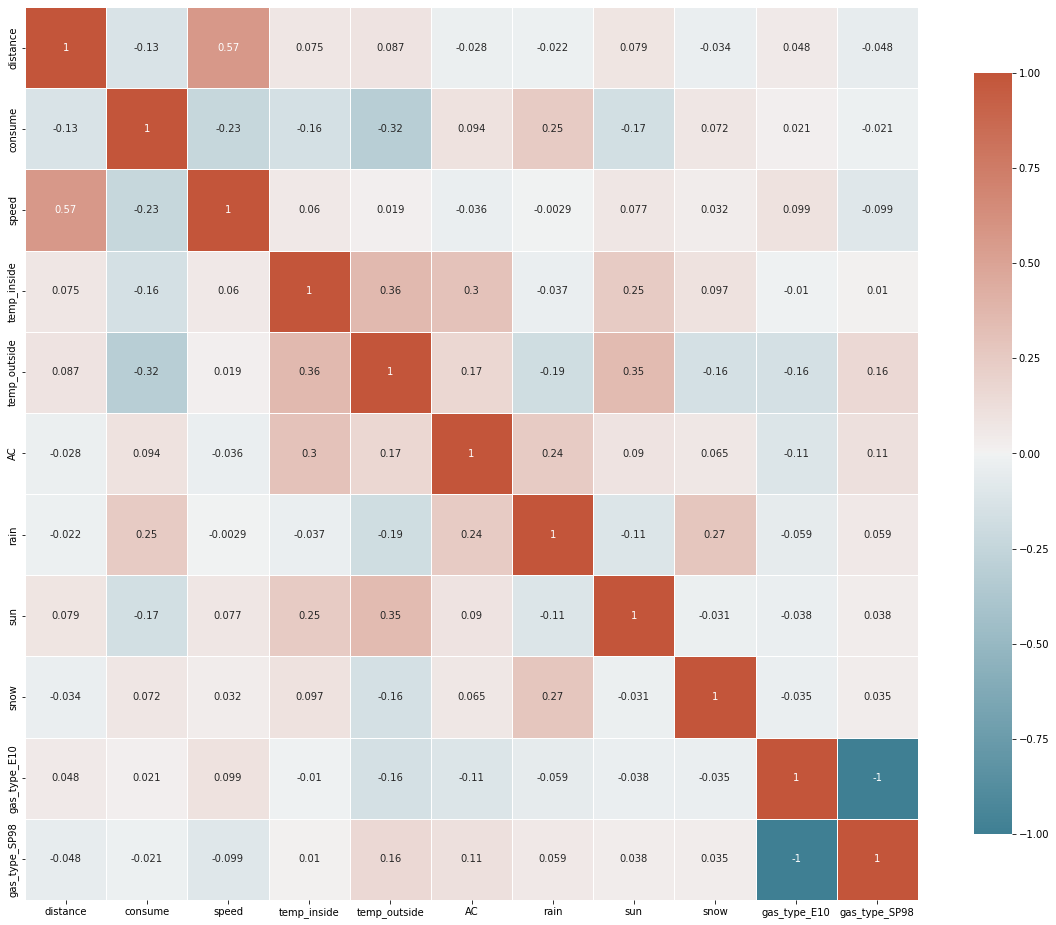

In [33]:
plt.figure(figsize=(20,20)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(medidas.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=True,
            cbar_kws={"shrink": .7
                     },# barra lateral
            xticklabels=True,
            yticklabels=True
);

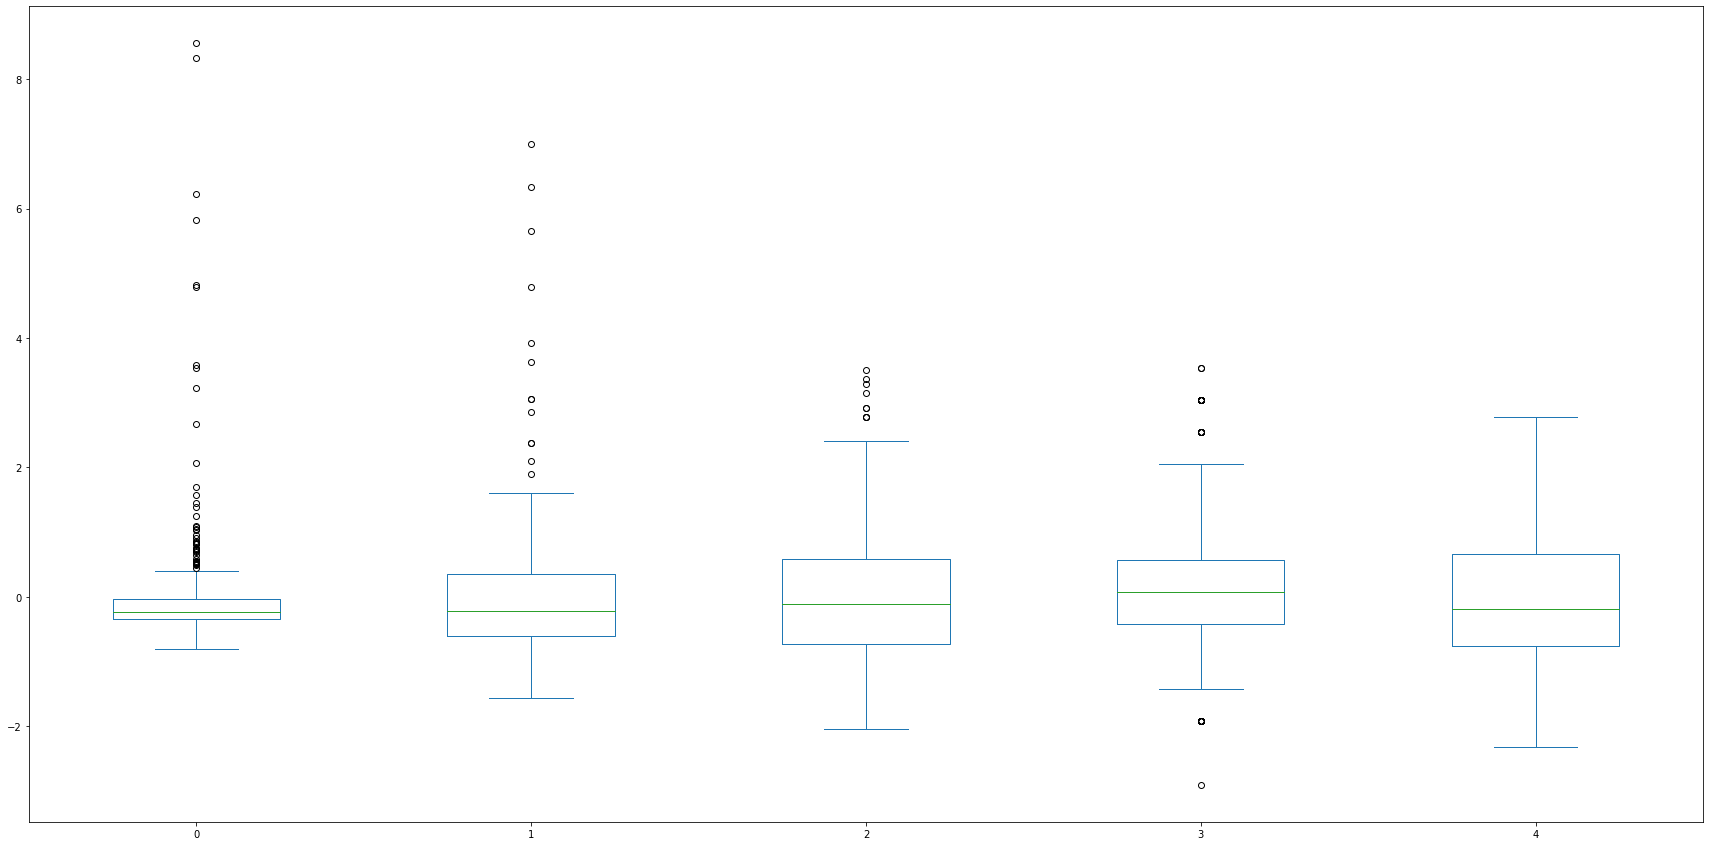

In [34]:
pd.DataFrame(StandardScaler().fit_transform(medidas))[list(map(int, list(range(5))))].plot(kind='box', figsize = (30,15));

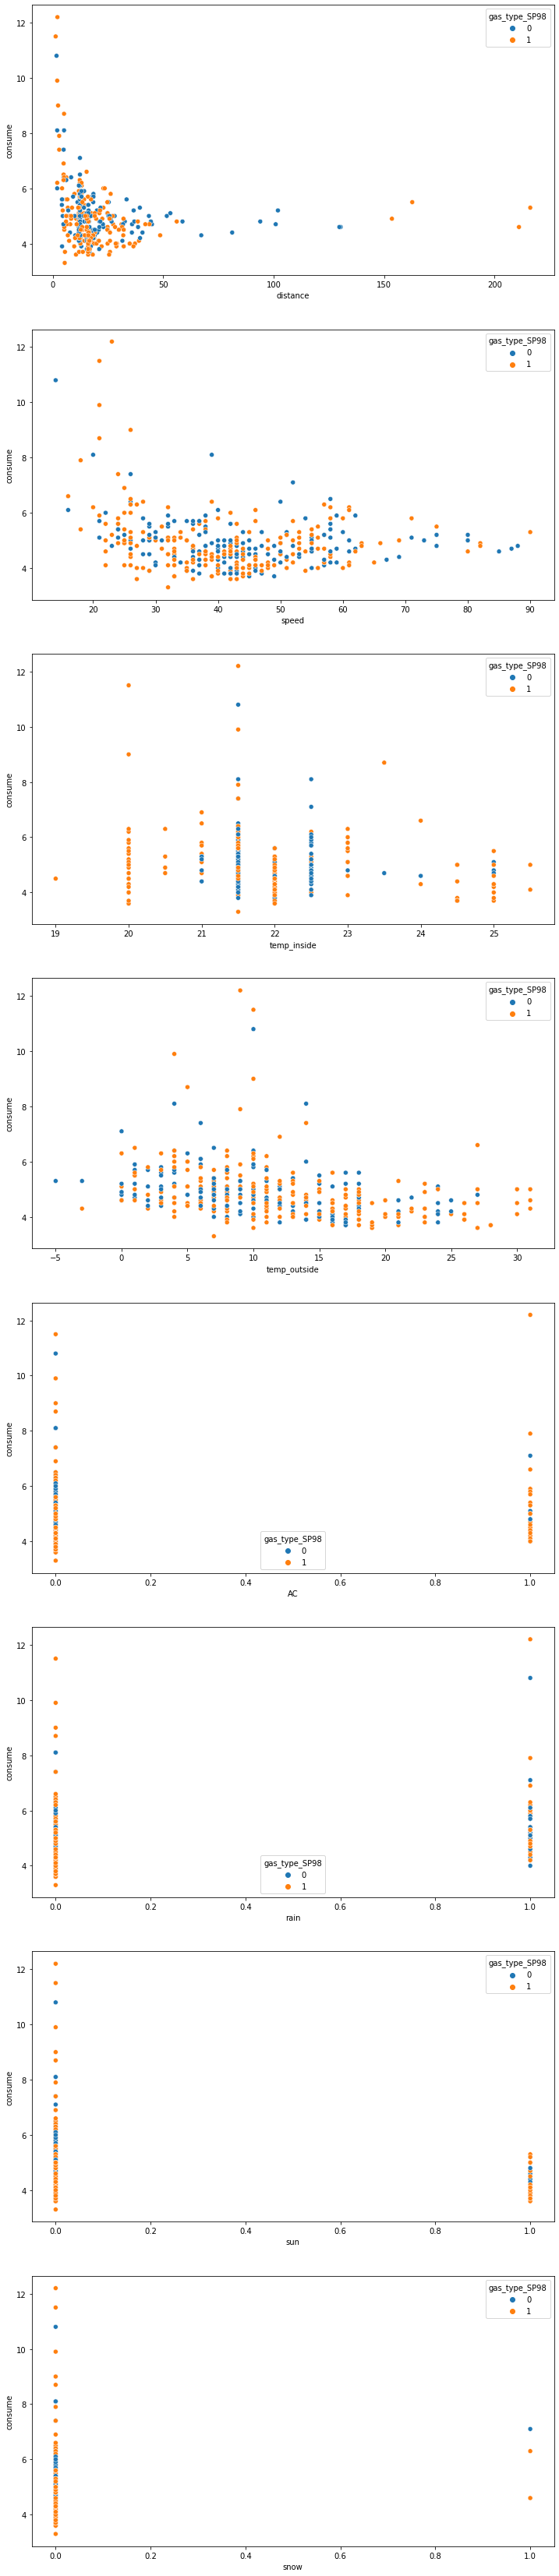

In [35]:
fig, axes = plt.subplots(8, 1,figsize=(12,60))
contador = 0
for e in medidas.drop(columns=['consume', 'gas_type_SP98', 'gas_type_E10']).columns:
    sns.scatterplot(x=e, y='consume', hue="gas_type_SP98",data=medidas, ax=axes[contador]);
    contador += 1

Con el consumo medio no se pueden sacar conclusiones, por lo que se va utilizar el consumo total. Este se obtiene simplemente mutiplicando el consumo medio por la distancia

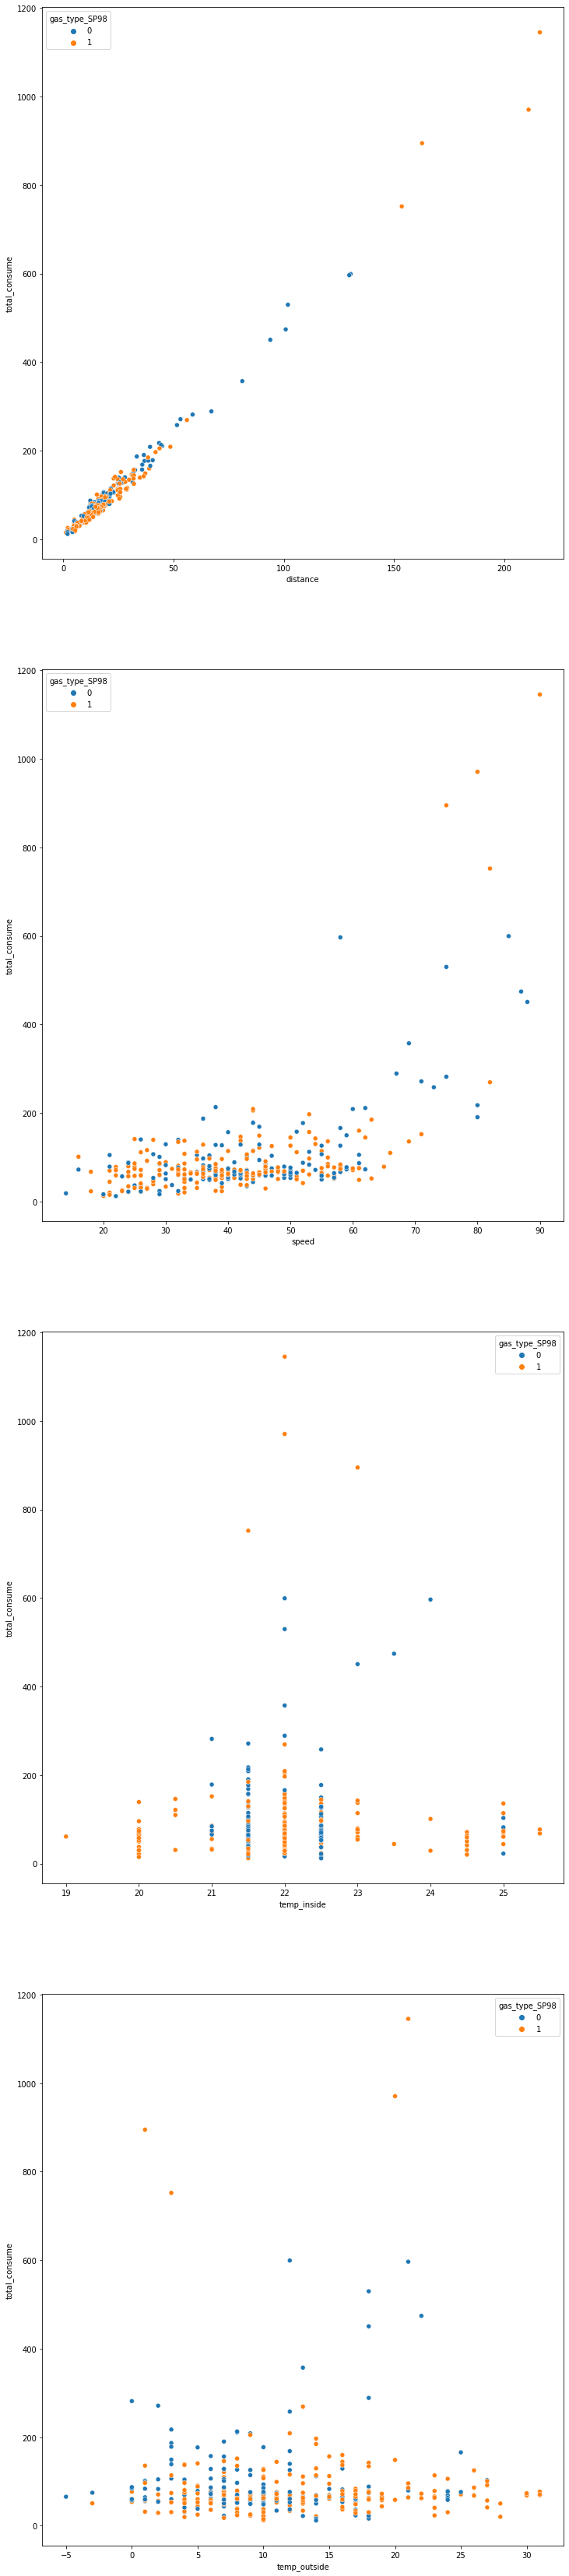

In [36]:
medidas['total_consume'] = medidas.consume * medidas.distance

fig, axes = plt.subplots(4, 1,figsize=(12,60))
contador = 0
for e in medidas.drop(columns=['total_consume', 'gas_type_SP98', 'gas_type_E10', 'consume', 'AC', 'rain', 'sun', 'snow']).columns:
    sns.scatterplot(x=e, y='total_consume', hue="gas_type_SP98",data=medidas, ax=axes[contador]);
    contador += 1

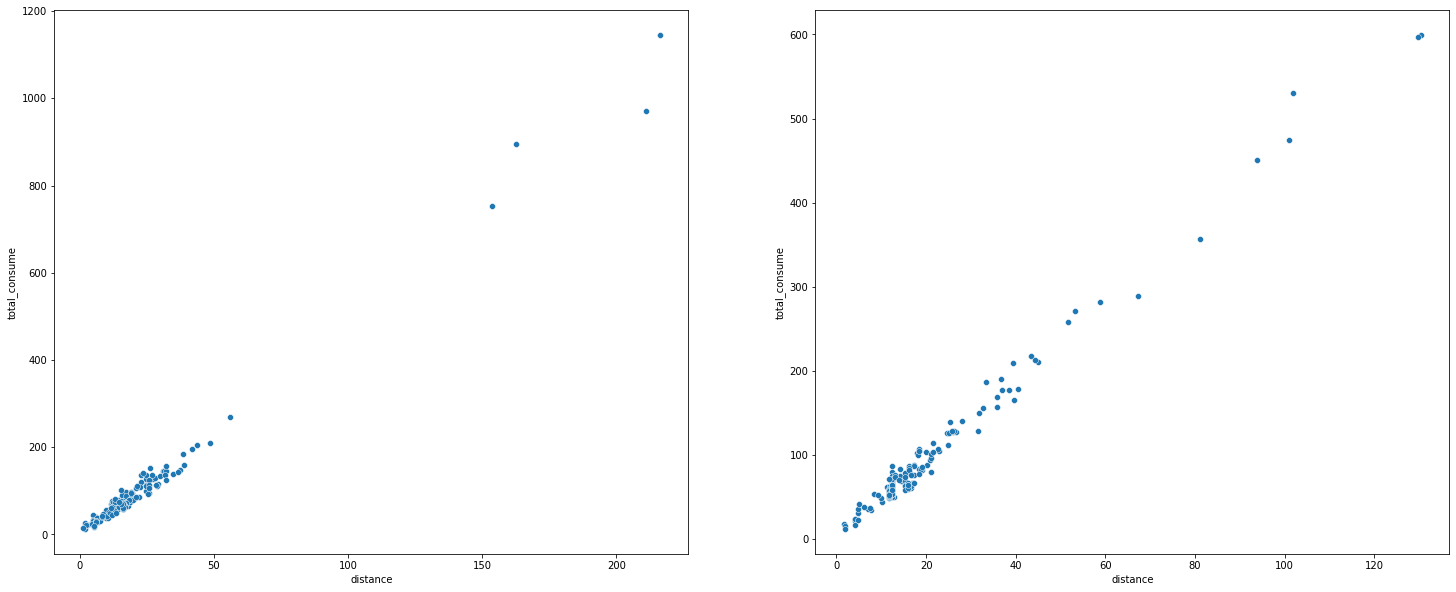

In [37]:
medidas['total_consume'] = medidas.consume * medidas.distance

fig, axes = plt.subplots(1, 2,figsize=(25,10))
sns.scatterplot(x='distance', y='total_consume',data=medidas[medidas.gas_type_SP98==1], ax=axes[0]);
sns.scatterplot(x='distance', y='total_consume',data=medidas[medidas.gas_type_E10==1], ax=axes[1]);

## Predicciones

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [39]:
X, y = medidas.drop(columns=['total_consume', 'gas_type_SP98', 'gas_type_E10']), medidas.gas_type_SP98

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

El modelo que se va a emplear es la regresión lineal

In [40]:
modelo = LogisticRegression().fit(X_train, y_train)

/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
logreg=LogisticRegression(#C=0.01, 
                          tol=0.0001, 
                          max_iter=70,
                          solver='lbfgs', 
                          multi_class='multinomial',)

logreg.fit(X=X_train, y=y_train)
y_pred=logreg.predict(X=X_test)
train_score=logreg.score(X_train, y_train)  
test_score=logreg.score(X_test, y_test)

print(logreg)
print('Train:', train_score)
print('Test:', test_score) 

LogisticRegression(max_iter=70, multi_class='multinomial')
Train: 0.59
Test: 0.5394736842105263


/home/rodrigo/miniconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


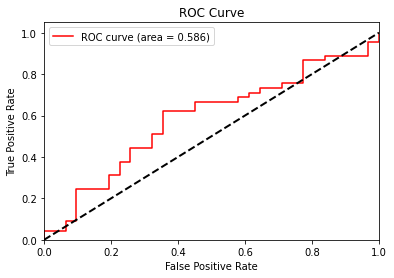

In [42]:
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show()